In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/Machine_Learning/Group_Project_Data/Train'
valid_dir = '/content/drive/MyDrive/Machine_Learning/Group_Project_Data/Valid'

In [4]:
img_size = (64, 64)
batch_size = 32
epochs = 5

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=90,
    shear_range = 0.4
)

In [17]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,
#     horizontal_flip= True,
#     vertical_flip= True,
#     fill_mode= 'wrap'
# )

In [18]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [19]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

valid_set = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
train_label = train_set.labels
valid_label = valid_set.labels

In [21]:
train_count = [np.count_nonzero(train_label == 0), 
               np.count_nonzero(train_label == 1)]
valid_count = [np.count_nonzero(valid_label == 0), 
               np.count_nonzero(valid_label == 1)]
classes = ['Fake', 'Real']

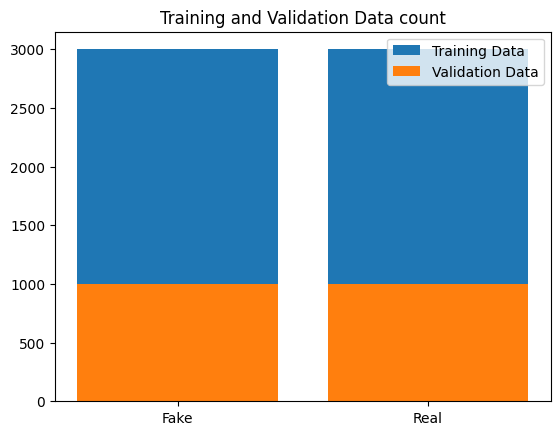

In [22]:
plt.figure()
plt.bar(classes,train_count, label = 'Training Data')
plt.bar(classes, valid_count, label = 'Validation Data')
plt.title('Training and Validation Data count')
plt.legend()
plt.show()

In [23]:
batch = train_set.next()

In [24]:
real_ind = [n for n in range(len(batch[1])) if batch[1][n] == 1]
fake_ind = [n for n in range(len(batch[1])) if batch[1][n] == 0]

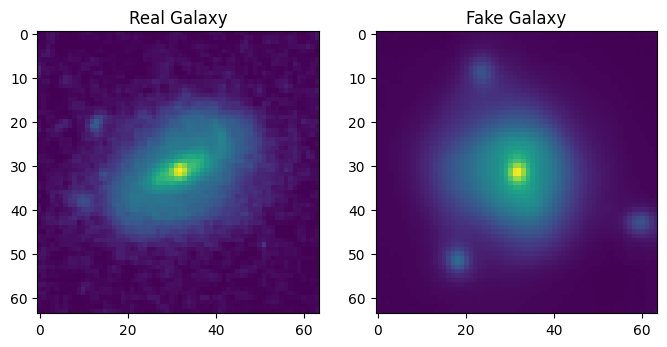

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (8,8))
ax[0].imshow(batch[0][real_ind[0]])
ax[0].set_title('Real Galaxy')
ax[1].imshow(batch[0][fake_ind[0]])
ax[1].set_title('Fake Galaxy')
plt.show()

In [38]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64,1),
                  padding='same',kernel_regularizer=regularizers.l2(0.001),
                  bias_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu',
                  padding='same',kernel_regularizer=regularizers.l2(0.001),
                  bias_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  padding='same',kernel_regularizer=regularizers.l2(0.001),
                  bias_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',
                  padding='same',kernel_regularizer=regularizers.l2(0.001),
                  bias_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

In [39]:

# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64,1),
#                    padding='same'),
#     layers.Conv2D(64, (3, 3), activation='relu',
#                   kernel_regularizer=regularizers.l1(0.01),padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu',
#                   padding='same'),
#     layers.Conv2D(64, (3, 3), activation='relu',
#                   kernel_regularizer=regularizers.l2(0.01),padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(16, (3, 3), activation='relu',
#                   padding='same'),
#     layers.Conv2D(16, (3, 3), activation='relu',
#                   kernel_regularizer=regularizers.l1(0.01),padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(20, activation='relu',
#                  kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dropout(0.1),
#     layers.Dense(1, activation='sigmoid')
# ])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)        

In [41]:
# autotun = tf.data.AUTOTUNE

# train_set = train_set.cache().prefetch(buffer_size=autotun)
# val_set = valid_set.cache().prefetch(buffer_size=autotun)

In [42]:
model.compile(loss= 'binary_crossentropy', 
              optimizer= optimizers.Adam(learning_rate=0.001), 
              metrics= ['accuracy'])

In [ ]:
Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_set,
    epochs=6,
    validation_data=valid_set,
    callbacks = [Early_Stop]
)

Epoch 1/6
188/188 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.9468

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')
plt.savefig('Fig 1')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(valid_set)

In [ ]:
test_loss

In [ ]:
test_acc

In [ ]:
pred = model.predict(valid_set)

In [ ]:
p = [1 * (x[0]>=0.5) for x in pred]

In [ ]:
valid_labels = valid_set.labels
valid_labels

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(valid_labels, p)
plt.figure(figsize=(8,8))
ax = sns.heatmap(data, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(valid_labels, p)
print(report)